# 02 SARSA agent

In [18]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/Users/paulabartabajo/src/online-courses/hands-on-rl/02_mountain_car/.venv/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Environment 🌎

In [19]:
import gym
env = gym.make('MountainCar-v0')
env._max_episode_steps = 1000

# LAPADULA: Workaround for pygame error: "error: No available video device"
# LAPADULA: See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# LAPADULA: This is only needed, I think, for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

## SARSA agent 🤖

In [20]:
from src.sarsa_agent import SarsaAgent

alpha = 0.1 # learning rate
gamma = 0.9 # discount factor

agent = SarsaAgent(env, alpha, gamma)

## Train

In [21]:
from src.loops import train

rewards, max_positions = train(
    agent, env, n_episodes=10000, epsilon=0.1)

Epsilon: 0.10: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:16<00:00, 17.99it/s]


## Plot train metrics

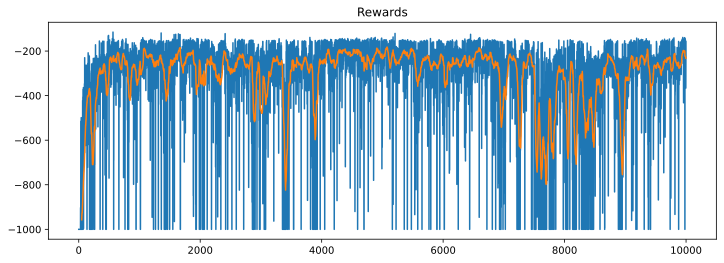

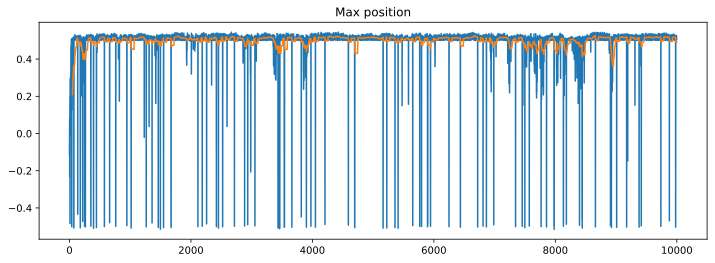

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Rewards")
pd.Series(rewards).plot(kind='line')
pd.Series(rewards).rolling(window=50).mean().plot(kind='line')
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Max position")    
pd.Series(max_positions).plot(kind='line')
pd.Series(max_positions).rolling(window=50).mean().plot(kind='line')
plt.show()

## Evaluate

In [ ]:
from src.loops import evaluate

n_episodes = 1000
eval_rewards, eval_max_positions = evaluate(
    agent, env, n_episodes)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.68it/s]


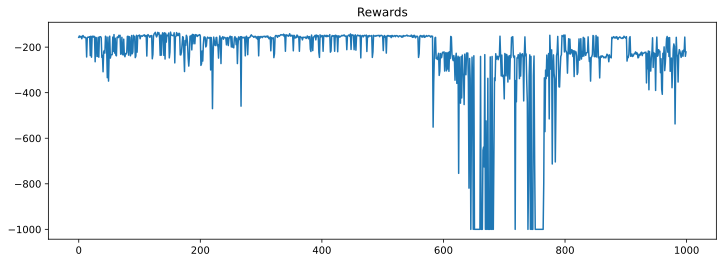

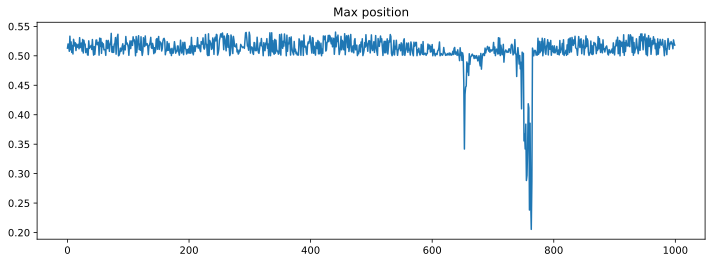

In [49]:
import pandas as pd

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Rewards")    
pd.Series(eval_rewards).plot(kind='line')
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Max position")    
pd.Series(eval_max_positions).plot(kind='line')
plt.show()

## And the success rate of our trained `SarsaAgent` is...

In [50]:
n_completed = sum([1 if m > 0.5 else 0 for m in eval_max_positions])
print(f'{n_completed} success out of {n_episodes} attempts')

955 success out of 1000 attempts


## Let's plot the agent's policy

#### 👉This is the agent's greedy policy.

#### 👉The greedy policy selects the action that maximizes the q-value function at any given state.

#### 👉In practice you can pick an epsilon-greedy policy, to avoid overfitting issues.

#### 👉Don't know what I am talking about? Read [part 2](https://towardsdatascience.com/hands-on-reinforcement-learning-course-part-2-1b0828a1046b) of the course.

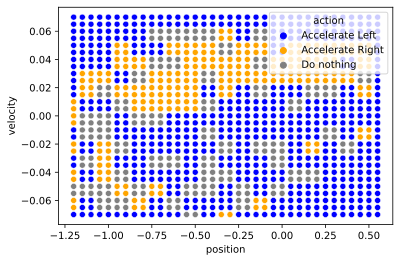

,position,velocity,action
0,-1.20,-0.070,Accelerate Left
1,-1.20,-0.065,Accelerate Right
2,-1.20,-0.060,Accelerate Right
3,-1.20,-0.055,Do nothing
4,-1.20,-0.050,Do nothing
...,...,...,...
1039,0.55,0.050,Accelerate Left
1040,0.55,0.055,Accelerate Left
1041,0.55,0.060,Accelerate Left
1042,0.55,0.065,Accelerate Left


In [47]:
from src.viz import plot_policy

positions = np.arange(env.min_position, env.max_position, 0.05)
velocities = np.arange(-env.max_speed, env.max_speed, 0.005)

plot_policy(agent, positions, velocities)

## Save the agent to disk 💾

In [26]:
from src.config import SAVED_AGENTS_DIR
path = SAVED_AGENTS_DIR / 'sarsa_agent_10k_steps'
print(f'Saving agent to {path}')
agent.save_to_disk(path)

## Let's see our agent in action 🎬

In [27]:
from src.viz import show_video

show_video(agent, env, sleep_sec=0.01)

## And plot the policy 🎨

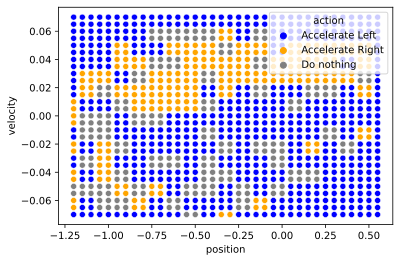

In [34]:
from src.viz import plot_policy

positions = np.arange(env.min_position, env.max_position, 0.05)
velocities = np.arange(-env.max_speed, env.max_speed, 0.005)
sarsa_policy = plot_policy(agent, positions, velocities)

## This is clearly different than the best one, from the MomentumAgent

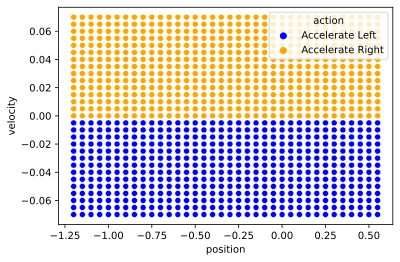

In [32]:
from src.momentum_agent import MomentumAgent

perfect_agent = MomentumAgent(env)
perfect_policy = plot_policy(perfect_agent, positions, velocities)

## Actually, they overlap only in 50% of the states

In [54]:
perfect_action = perfect_policy['action']
sarsa_action = sarsa_policy['action']

(perfect_action == sarsa_action).sum() / len(perfect_action)

0.5